# Assignment - 28 - MACHINE LEARNING - 8
## By Prakash Ghosh
---

### Problem Statement: Find the frequency of words in a webpage.

* User can use urllib and BeautifulSoup to extract text from webpage.

* Hint:<br>
from bs4 import BeautifulSoup<br>
import urllib.request<br>
import nltk<br><br>

response = urllib.request.urlopen('http://php.net/')<br>
html = response.read()<br>
soup = BeautifulSoup(html,"html5lib")

---

In [49]:
# Import Libraries
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup 
import urllib.request 
import nltk 

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

### Load Data

In [50]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [51]:
text = soup.get_text(strip=True)
print (text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

### Analyze Data

In [52]:
# Convert the text into tokens 
tokens = [t for t in text.split()]

# Print token
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

In [53]:
# Now calculate the frequency distribution of the tokens
frequency_token = nltk.FreqDist(tokens)

# Print frequency of all tikens
for key,val in frequency_token.items():
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:80
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:2
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:4
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffe

In [54]:
# Print frequency of all tikens having frequency >20
for key,val in frequency_token.items():
    if val>20:
        print (str(key) + ':' + str(val))

and:80
to:43
is:50
a:26
PHP:153
the:126
in:71
ReleasedThe:23
team:25
of:101
this:29
source:31
downloads:25
please:25
visit:25
Windows:24
binaries:24
can:78
be:79
found:68
list:31
version:21
release:77
on:27
for:71
7.3.0:26
you:36
read:23
also:23


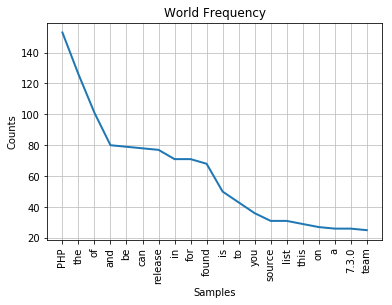

In [55]:
# Plot a graph with the frequent words i.e. Frequency>20 
frequency_token.plot(20, cumulative=False,title='Word Frequency')

#### Note:
The graph includes all the words including article, Grammer etc.<br>
In the next analysis we will remove those stop words 

In [56]:
# From wordcloud lib get the standard list of the Stop Words
stopwords = set(STOPWORDS)

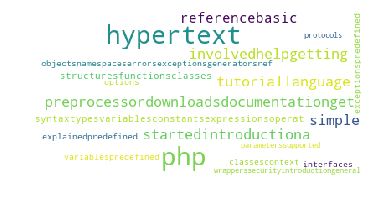

In [57]:
# Create Word Cloud
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=20,
                      max_font_size=30, 
                      random_state=1
                     ).generate(str(df['word']))
# Print the Plot
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordcloud1.png", dpi=1000)

### Process Data

In [58]:
# Create a dataframe with the words and their frequency
df=pd.DataFrame()
df['word']=frequency_token.keys()
df['count']=frequency_token.values()
df.head(5)

,word,count
0,PHP:,1
1,Hypertext,1
2,PreprocessorDownloadsDocumentationGet,1
3,InvolvedHelpGetting,1
4,StartedIntroductionA,1


In [59]:
# Convert all the tokens to lower case
df['word'] = df['word'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(5)

,word,count
0,php:,1
1,hypertext,1
2,preprocessordownloadsdocumentationget,1
3,involvedhelpgetting,1
4,startedintroductiona,1


In [61]:
# Remove the Punctuation
df['word'] = df['word'].str.replace('[^\w\s]','')
df.head(5)

,word,count
0,php,1
1,hypertext,1
2,preprocessordownloadsdocumentationget,1
3,involvedhelpgetting,1
4,startedintroductiona,1


#### Remove Stopwords

In [62]:
# From wordcloud lib get the standard list of the Stop Words
stopwords = set(STOPWORDS)
df['word'] = df['word'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df.head(5)

,word,count
0,php,1
1,hypertext,1
2,preprocessordownloadsdocumentationget,1
3,involvedhelpgetting,1
4,startedintroductiona,1


#### Streaming

In [63]:
# Stemming i.e removing suffix (ing/ly/s/es etc) using PorterStemmer of NLTK
stream = PorterStemmer()
df['word'].apply(lambda x: " ".join([stream.stem(word) for word in x.split()]))
df.head(5)

,word,count
0,php,1
1,hypertext,1
2,preprocessordownloadsdocumentationget,1
3,involvedhelpgetting,1
4,startedintroductiona,1


In [73]:
# Seperate 20 most frequent words
df_new=pd.DataFrame()
df_new=df.loc[(df.word.values!='')].sort_values(by=['count'],ascending=False).head(20)
df_new

,word,count
136,php,153
202,release,77
187,found,68
190,list,31
177,source,31
250,730,26
179,please,25
157,team,25
178,downloads,25
180,visit,25


In [80]:
df_new['word'].values

array(['php', 'release', 'found', 'list', 'source', '730', 'please',
       'team', 'downloads', 'visit', 'windows', 'binaries', 'releasedthe',
       'read', 'version', 'features', '2018php', 'next', 'new', 'test'],
      dtype=object)

In [79]:
df_new['count'].values

array([153,  77,  68,  31,  31,  26,  25,  25,  25,  25,  24,  24,  23,
        23,  21,  20,  20,  20,  20,  19])

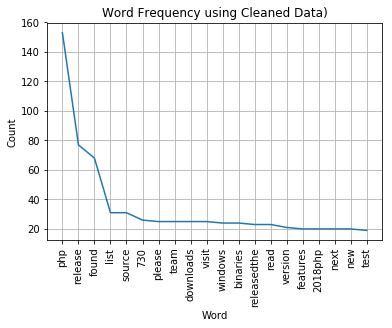

In [82]:
# Plot using the df_new i.e. cleaned data
plt.plot(df_new['word'].values, df_new['count'].values)
plt.xlabel('Word')
plt.ylabel('Count')

plt.title('Word Frequency using Cleaned Data)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

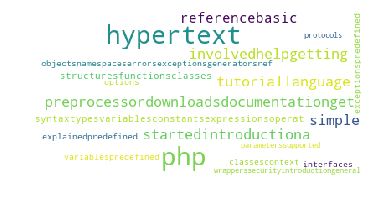

In [87]:
# Top Frequency Words in Word Cloud
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords, 
    max_words=20,
    max_font_size=30,
    random_state=1 
    ).generate(str(df['word']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()